In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
matplotlib.rcParams['axes.unicode_minus'] = False # - 부호 깨짐 방지
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [4]:
# 데이터 빈도 (hist, box)
# 데이터 전처리
# 변수 검토
# 변수간 관계 분석 및 시각화

xls = pd.ExcelFile('./data/koweps_visualization.xlsx')

In [5]:
koweps_df = xls.parse(xls.sheet_names[0])

In [6]:
data_df = koweps_df.copy()
data_df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


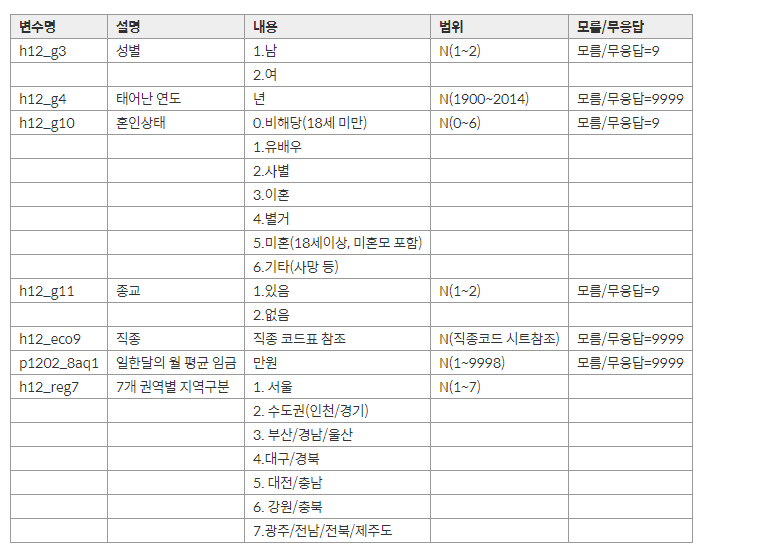

In [7]:
from IPython.display import Image
Image('./img/koweps_img.png')

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Columns: 1191 entries, h12_id to h12_pers_income5
dtypes: float64(999), int64(191), object(1)
memory usage: 140.1+ MB


In [9]:
# 해당 데이터프레임에서 제공해주는 컬럼들만 추출하여 rename
temp_df = data_df[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']]
temp_df.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
temp_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자


**************************************************


여자    8440
남자    6982
Name: 성별2, dtype: int64

**************************************************


,명
여자,8440
남자,6982


**************************************************


,명
남자,6982
여자,8440


**************************************************


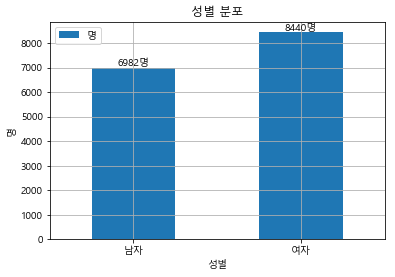

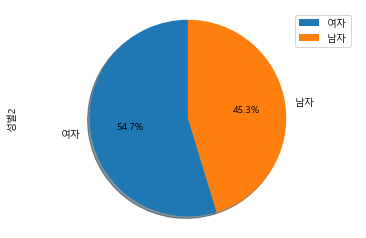

In [11]:
# 성별의 데이터 분포 확인
# 성별을 비율순으로 정렬
# 데이터 시각화

# 성별을 남, 여로 변경
gender_filter_df = temp_df.filter(['성별'])
gender_filter_df['성별2'] = np.where(gender_filter_df['성별'] == 1, '남자', '여자')
display(gender_filter_df.head())
print('*' * 50)

# 데이터 분포 확인
gender_count = gender_filter_df['성별2'].value_counts()
display(gender_count)
print('*' * 50)

# 시리즈를 데이터프레임으로 변환
gender_count_df = pd.DataFrame(gender_count)
gender_count_df.rename(columns = {'성별2' : '명'}, inplace = True)
display(gender_count_df)
print('*' * 50)

# 비율순으로 정렬
gender_count_df.sort_values('명', inplace = True)
display(gender_count_df)
print('*' * 50)

# 시각화
gender_count_df.plot.bar(rot = 0)
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

# 명 수 표시
for idx, value in enumerate(list(gender_count_df['명'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.show()

# pie plot
gender_count.plot.pie(autopct= '%.1f%%', startangle = 90, legend = True, shadow = True, labels = gender_count.index)
plt.axis('equal')
plt.show()

In [12]:
# 성별에 따른 평균 급여 차이를 분석

# 성별과 월급 데이터만 추출
gender_salary_df = temp_df[['성별', '일한달의 월 평균 임금']]
gender_salary_df.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [13]:
# 성별을 남자와 여자로 변환
gender_salary_df['성별'] = np.where(gender_salary_df['성별'] == 1, '남자', '여자')
gender_salary_df.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [14]:
# 데이터 정제(결측치 확인 및 제거, 이상치 결측처리)
print(gender_salary_df.isna().sum())
gender_salary_df.dropna(inplace = True)
print('*' * 50)

print(gender_salary_df.isna().sum())

gender_salary_df['일한달의 월 평균 임금'] = np.where(
    (gender_salary_df['일한달의 월 평균 임금'] < 1) | (gender_salary_df['일한달의 월 평균 임금'] > 9998),
    np.nan, gender_salary_df['일한달의 월 평균 임금'])
print('\n')

print(gender_salary_df.isna().sum())
gender_salary_df.dropna(inplace = True)
print('*' * 50)

print(gender_salary_df.isna().sum())



# print(gender_salary_df.isna().sum())

# gender_salary_df = gender_salary_df.dropna()
# display(gender_salary_df.head())

# print(gender_salary_df.isna().sum())

성별                  0
일한달의 월 평균 임금    10915
dtype: int64
**************************************************
성별              0
일한달의 월 평균 임금    0
dtype: int64


성별               0
일한달의 월 평균 임금    14
dtype: int64
**************************************************
성별              0
일한달의 월 평균 임금    0
dtype: int64


In [15]:
# 데이터 분석(성별로 그룹화하여 그룹별 평균)
gender_salary_avg_df = gender_salary_df.groupby('성별')[['일한달의 월 평균 임금']].mean()
display(gender_salary_avg_df)

,일한달의 월 평균 임금
성별,
남자,333.422185
여자,176.359967


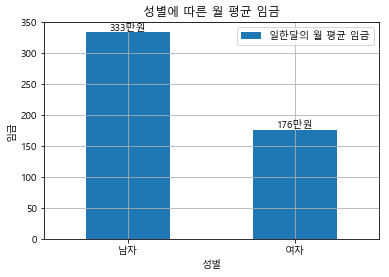

In [16]:
# 데이터 시각화
gender_salary_avg_df.plot.bar(rot = 0)
plt.title('성별에 따른 월 평균 임금')
plt.ylabel('임금')
plt.grid()

for idx, value in enumerate(list(gender_salary_avg_df['일한달의 월 평균 임금'])) :
    txt = '%d만원' % value
    plt.text(idx, value, txt, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.show()

In [17]:
# 나이에 따른 평균 급여 변화

# 데이터 전처리
# 태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가
birth_salary_df = temp_df[['태어난 연도', '일한달의 월 평균 임금']]
birth_salary_df['나이'] = 2020 - birth_salary_df['태어난 연도'] + 1
birth_salary_df.head()

,태어난 연도,일한달의 월 평균 임금,나이
0,1936,NaN,85
1,1945,NaN,76
2,1948,NaN,73
3,1942,108.9,79
4,1923,NaN,98


In [18]:
# 데이터 정제
# 결측값 확인, 결측값 제거, 이상치 결측처리
print(birth_salary_df.isna().sum())
birth_salary_df.dropna(inplace = True)
print('*' * 50)

print(birth_salary_df.isna().sum())

# 이상치 결측처리
birth_salary_df['일한달의 월 평균 임금'] = np.where(
    (birth_salary_df['일한달의 월 평균 임금'] < 1) | (birth_salary_df['일한달의 월 평균 임금'] > 9998), 
    np.nan, birth_salary_df['일한달의 월 평균 임금'])

birth_salary_df['태어난 연도'] = np.where(
    (birth_salary_df['태어난 연도'] < 1900) | (birth_salary_df['태어난 연도'] > 2014), np.nan, birth_salary_df['태어난 연도'])

print('\n')

print(birth_salary_df.isna().sum())
birth_salary_df.dropna(inplace = True)
print('*' * 50)

print(birth_salary_df.isna().sum())

태어난 연도              0
일한달의 월 평균 임금    10915
나이                  0
dtype: int64
**************************************************
태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64


태어난 연도           0
일한달의 월 평균 임금    14
나이               0
dtype: int64
**************************************************
태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64


In [19]:
# 데이터 분석
# 나이별 급여 평균
# 방법 1
birth_salary_df['나이대'] = np.trunc(birth_salary_df['나이'] / 10) * 10
display(birth_salary_df.head())

birth_salary_avg_df = birth_salary_df.groupby('나이대')[['일한달의 월 평균 임금']].mean()
birth_salary_avg_df

,태어난 연도,일한달의 월 평균 임금,나이,나이대
3,1942.0,108.9,79,70.0
10,1940.0,20.0,81,80.0
16,1978.0,322.0,43,40.0
17,1975.0,120.0,46,40.0
24,1975.0,300.0,46,40.0


,일한달의 월 평균 임금
나이대,
20.0,154.890476
30.0,248.058273
40.0,329.490912
50.0,314.754431
60.0,226.846086
70.0,94.149102
80.0,35.000000
90.0,22.000000


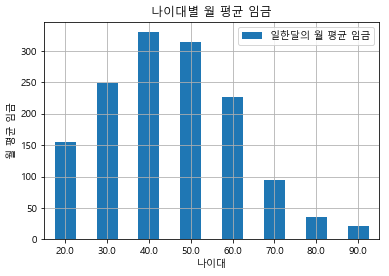

In [36]:
# 데이터 시각화
birth_salary_avg_df.plot.bar(rot = 0)
plt.grid()
plt.title('나이대별 월 평균 임금')
plt.ylabel('월 평균 임금')
plt.show()

In [210]:
# 나이별 급여 평균
# 방법 2
for i in range(len(birth_salary_df)):
    if birth_salary_df['나이'][i:i+1].values[0] < 30 :
        birth_salary_df['age_group'][i:i+1] = '20대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 40 :
        birth_salary_df['age_group'][i:i+1] = '30대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 50 :
        birth_salary_df['age_group'][i:i+1] = '40대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 60 :
        birth_salary_df['age_group'][i:i+1] = '50대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 70 :
        birth_salary_df['age_group'][i:i+1] = '60대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 80 :
        birth_salary_df['age_group'][i:i+1] = '70대'
    elif birth_salary_df['나이'][i:i+1].values[0] < 90 :
        birth_salary_df['age_group'][i:i+1] = '80대'
    else :
        birth_salary_df['age_group'][i:i+1] = '90대'

In [24]:
# 나이에 따른 평균 급여 변화

# 연령대 분포 분석
want_columns_df = temp_df.copy()
want_columns_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [27]:
year_df = want_columns_df.filter(['태어난 연도'])
year_df.head()

,태어난 연도
0,1936
1,1945
2,1948
3,1942
4,1923


In [32]:
# 나이를 계산 후 파생변수 추가
year_df['나이'] = dt.datetime.now().year - year_df['태어난 연도'] + 1
year_df.head()

,태어난 연도,나이
0,1936,85
1,1945,76
2,1948,73
3,1942,79
4,1923,98


In [33]:
# 연령대를 분석하기 위한 파생변수 추가
year_df['연령대'] = (year_df['나이'] // 10) * 10
year_df.head()

,태어난 연도,나이,연령대
0,1936,85,80
1,1945,76,70
2,1948,73,70
3,1942,79,70
4,1923,98,90


In [34]:
# 결측값 확인 및 정제
year_df.isna().sum()

태어난 연도    0
나이        0
연령대       0
dtype: int64

In [42]:
# 연령대별 빈도수 확인
# 1
# age_gen_df = year_df.filter(['나이', '연령대']).groupby('연령대').count()
# age_gen_df

# 2
age_gen_df2 = pd.DataFrame(year_df['연령대'].value_counts())
age_gen_df2.sort_index(inplace = True)
age_gen_df2

,연령대
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148
90,386


In [45]:
# 인덱스를 의미있는 이름으로 수정
reIndex = {}
for idx in list(age_gen_df2.index) :
    reIndex[idx] = '%d대' % idx

age_gen_df2.rename(index = reIndex, inplace = True)
age_gen_df2

,연령대
0대,470
10대,1442
20대,1567
30대,1315
40대,1946
50대,1994
60대,1948
70대,2190
80대,2148
90대,386


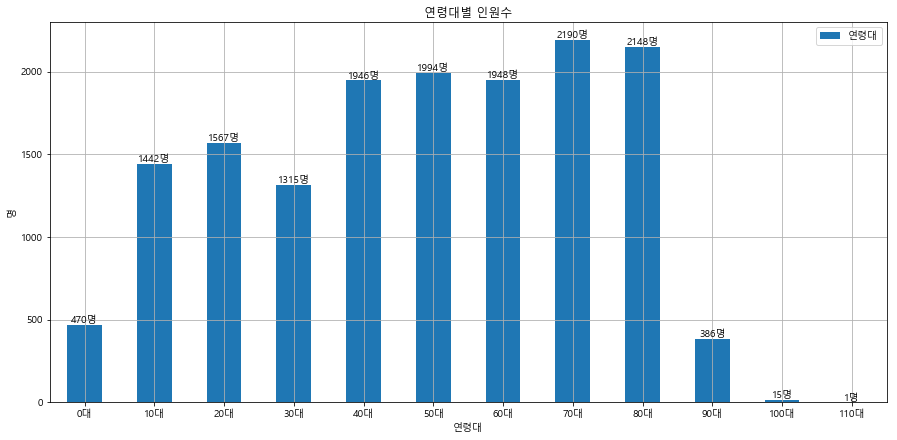

In [94]:
# 시각화
age_gen_df2.plot.bar(rot = 0)
plt.rcParams['figure.figsize'] = (15, 7)
plt.grid()
plt.title('연령대별 인원수')
plt.xlabel('연령대')
plt.ylabel('명')

# 수치 표시
for idx, value in enumerate(list(age_gen_df2['연령대'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.show()

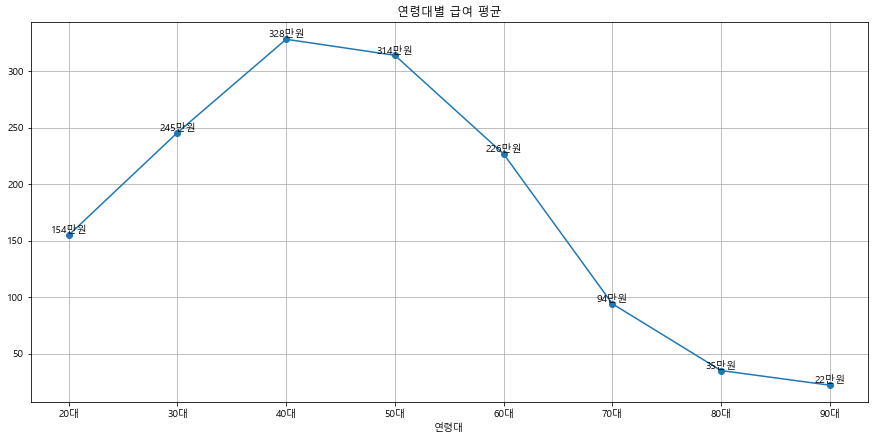

In [202]:
# 연령대별 평균 급여 변화
# 시각화 plot()

salary_df = want_columns_df[['태어난 연도', '일한달의 월 평균 임금']]
salary_df.head()

# 연령대 컬럼 생성
salary_df['연령대'] = (dt.datetime.now().year - salary_df['태어난 연도'] + 1) // 10 * 10
salary_df.head()

# 결측치 제거
salary_df.isna().sum()
salary_df.dropna(inplace = True)
salary_df.head()

# 연령대별 임금의 평균
salary_df02 = salary_df.groupby('연령대')[['일한달의 월 평균 임금']].mean()
salary_df02

# 인덱스를 의미있는 이름으로 수정
reIndex = {}
for idx in list(salary_df02.index) :
    reIndex[idx] = '%d대' % idx

salary_df02.rename(index = reIndex, inplace = True)
salary_df02

# 시각화
plt.plot(salary_df02.index, salary_df02['일한달의 월 평균 임금'], marker='o')
plt.rcParams['figure.figsize'] = (15, 7)
plt.title('연령대별 급여 평균')
plt.grid()
plt.xlabel('연령대')


# 수치 표시
for idx, value in enumerate(list(salary_df02['일한달의 월 평균 임금'])) :
    txt = '%d만원' % value
    plt.text(idx, value, txt, horizontalalignment = 'center', verticalalignment = 'bottom')

plt.show()

In [120]:
# 성별 분포와 연령대 분포 분석 및 시각화
gender_year_dist_df = want_columns_df.filter(['성별', '태어난 연도'])
gender_year_dist_df.head()

,성별,태어난 연도
0,2,1936
1,2,1945
2,1,1948
3,1,1942
4,2,1923


In [121]:
# 성별값을 남자, 여자로 변경
gender_year_dist_df['성별'] = np.where(gender_year_dist_df['성별'] == 1, '남자', '여자')
gender_year_dist_df.head()

,성별,태어난 연도
0,여자,1936
1,여자,1945
2,남자,1948
3,남자,1942
4,여자,1923


In [122]:
# 연령대 계산 후 파생변수 추가
gender_year_dist_df['연령대'] = (dt.datetime.now().year - gender_year_dist_df['태어난 연도'] + 1) // 10 * 10
gender_year_dist_df.head()

,성별,태어난 연도,연령대
0,여자,1936,80
1,여자,1945,70
2,남자,1948,70
3,남자,1942,70
4,여자,1923,90


In [123]:
# 데이터 정제
# 이상치 확인 후 결측값 확인/제거
gender_year_dist_df['태어난 연도'] = np.where(
    (gender_year_dist_df['태어난 연도'] < 1900) | (gender_year_dist_df['태어난 연도'] > 2014), np.nan, gender_year_dist_df['태어난 연도'])
print(gender_year_dist_df.isna().sum())
print('*' * 50)

gender_year_dist_df.dropna(inplace = True)
print(gender_year_dist_df.isna().sum())

성별          0
태어난 연도    134
연령대         0
dtype: int64
**************************************************
성별        0
태어난 연도    0
연령대       0
dtype: int64


In [126]:
# 데이터 분석
# 성별과 연령대별로 빈도수 계산
temp_df = gender_year_dist_df.groupby(['성별', '연령대'], as_index = False).count()
temp_df.columns = ['성별', '연령대', '인원수']
temp_df

,성별,연령대,인원수
0,남자,0,163
1,남자,10,732
2,남자,20,710
3,남자,30,636
4,남자,40,981
5,남자,50,1004
6,남자,60,888
7,남자,70,834
8,남자,80,820
9,남자,90,132


In [127]:
# 성별이 컬럼이 되고 연령대가 인덱스가 되도록, 데이터에 인원수가 배치되도록 pivot 구성
# 필요에 따라서 인덱스 이름을 변경
temp_df02 = temp_df.pivot_table('인원수', '연령대', '성별')

# 인덱스를 의미있는 이름으로 수정
age_group = {}
for idx in list(temp_df02.index) :
    age_group[idx] = '%d대' % idx

temp_df02.rename(index = age_group, inplace = True)
temp_df02

성별,남자,여자
연령대,,
0대,163.0,173.0
10대,732.0,710.0
20대,710.0,857.0
30대,636.0,679.0
40대,981.0,965.0
50대,1004.0,990.0
60대,888.0,1060.0
70대,834.0,1356.0
80대,820.0,1328.0


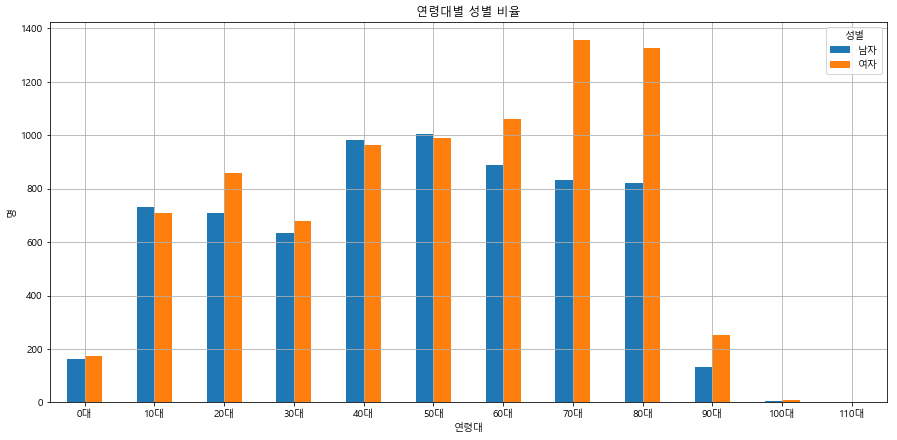

In [128]:
# 시각화
temp_df02.plot.bar(rot = 0)
plt.grid()
plt.title('연령대별 성별 비율')
plt.xlabel('연령대')
plt.ylabel('명')
plt.show()

In [138]:
# 지역별 연령층 분포와 연령층별 지역비율
want_columns_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [139]:
region_age_df = want_columns_df.filter(['태어난 연도', '7개 권역별 지역구분'])
region_age_df.head()

,태어난 연도,7개 권역별 지역구분
0,1936,1
1,1945,1
2,1948,1
3,1942,1
4,1923,1


In [140]:
# 파생변수 나이 추가
# 태어난 연도 컬럼 제거
region_age_df['나이'] = dt.datetime.now().year - region_age_df['태어난 연도'] + 1
region_age_df.drop('태어난 연도', axis = 1, inplace = True)
region_age_df.head()

,7개 권역별 지역구분,나이
0,1,85
1,1,76
2,1,73
3,1,79
4,1,98


In [143]:
# 지역코드와 매칭되는 데이터 프레임 생성 및 병합
region_code_df = pd.DataFrame({
    '지역코드' : list(range(1, 8)),
    '지역명' : ['서울', '수도권(인천/경기)', '부산/경남/울산', '대구/경북', '대전/충남', '강원/충북', '광주/전남/전북/제주도']
})

region_code_df

,지역코드,지역명
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [145]:
region_age_code_df = pd.merge(region_age_df, region_code_df, left_on = '7개 권역별 지역구분', right_on = '지역코드')
region_age_code_df.drop('7개 권역별 지역구분', axis = 1, inplace = True)
region_age_code_df.head()

,나이,지역코드,지역명
0,85,1,서울
1,76,1,서울
2,73,1,서울
3,79,1,서울
4,98,1,서울


In [151]:
# 데이터 분석
# 연령층은 나이 구간을 설정
# 나이 < 30 : 청년층, 나이 < 60 : 중년층, 그렇지 않으면 노년층
# 연령층 파생컬럼을 추가하여 최종 데이터 프레임 생성

# 1
def age(x) :
    c = ''
    if x < 30 :
        c = '청년층'
    elif x < 60 :
        c = '중년층'
    else :
        c = '노년층'
    
    return c

region_age_code_df['연령층'] = region_age_code_df['나이'].apply(lambda x : age(x))
region_age_code_df.head()

,나이,지역코드,지역명,연령층
0,85,1,서울,노년층
1,76,1,서울,노년층
2,73,1,서울,노년층
3,79,1,서울,노년층
4,98,1,서울,노년층


In [152]:
# 2
condition01 = [region_age_code_df['나이'] < 30, region_age_code_df['나이'] < 60, region_age_code_df['나이'] >= 60]
condition02 = ['청년층', '중년층', '노년층']
region_age_code_df['연령층'] = np.select(condition01, condition02)
region_age_code_df.head()

,나이,지역코드,지역명,연령층
0,85,1,서울,노년층
1,76,1,서울,노년층
2,73,1,서울,노년층
3,79,1,서울,노년층
4,98,1,서울,노년층


In [167]:
# 지역과 연령층에 대한 빈도분포를 확인
temp_df = region_age_code_df.filter(['나이', '지역명', '연령층']).groupby(['지역명', '연령층']).count()
temp_df.rename(columns = {'나이' : '인원'}, inplace = True)
temp_df

인원
지역명          연령층      
강원/충북        노년층   567
             중년층   361
             청년층   252
광주/전남/전북/제주도 노년층  1283
             중년층   867
             청년층   599
대구/경북        노년층   973
             중년층   537
             청년층   364
대전/충남        노년층   591
             중년층   443
             청년층   321
부산/경남/울산     노년층  1189
             중년층   844
             청년층   531
서울           노년층   858
             중년층   868
             청년층   482
수도권(인천/경기)   노년층  1227
             중년층  1335
             청년층   930

In [170]:
# 분석결과를 pivot
# 지역을 인덱스, 연령층을 컬럼, 나이를 값으로 구성
temp_df02 = temp_df.pivot_table('인원', '지역명', '연령층')
temp_df02

연령층,노년층,중년층,청년층
지역명,,,
강원/충북,567,361,252
광주/전남/전북/제주도,1283,867,599
대구/경북,973,537,364
대전/충남,591,443,321
부산/경남/울산,1189,844,531
서울,858,868,482
수도권(인천/경기),1227,1335,930


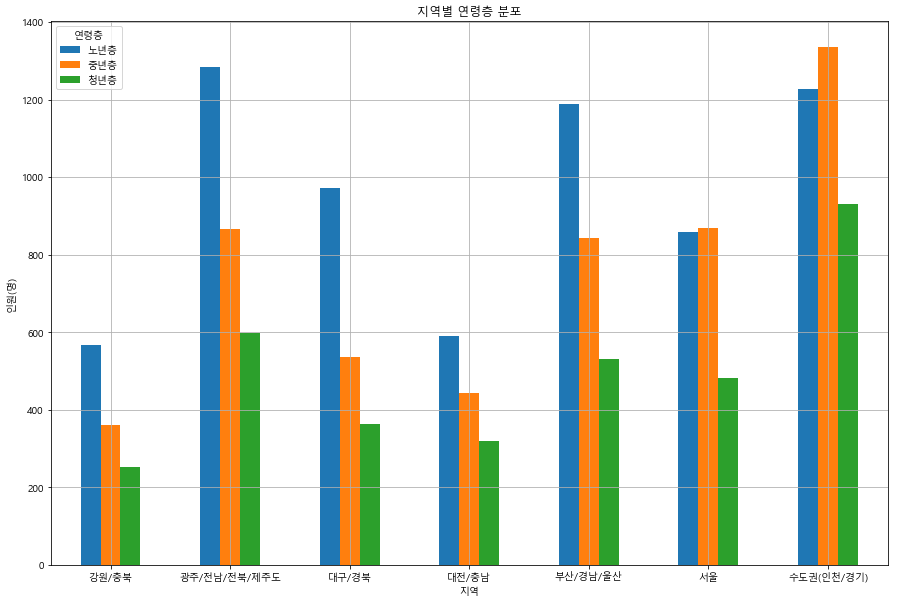

In [199]:
# 시각화
temp_df02.plot.bar(rot = 0)
plt.grid()
plt.title('지역별 연령층 분포')
plt.xlabel('지역')
plt.ylabel('인원(명)')
plt.show()

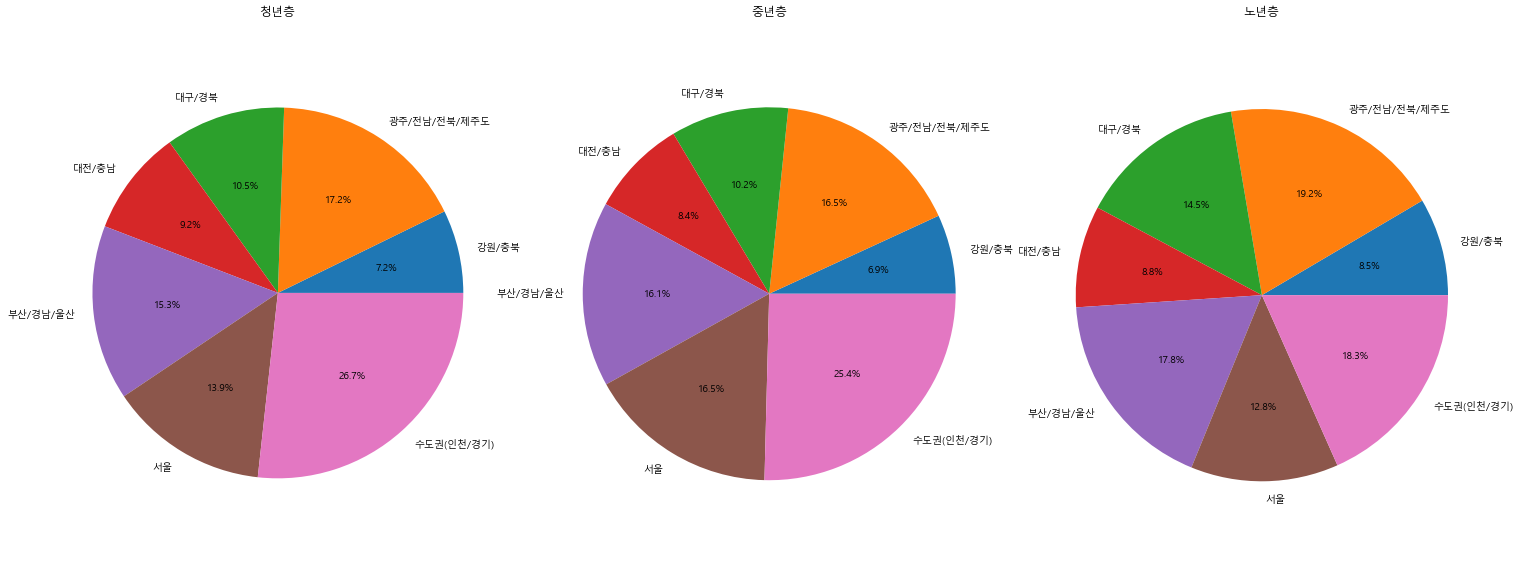

In [198]:
# pie chart 시각화
# 연령대별
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15, 10)
area01 = fig.add_subplot(1, 3, 1)
area02 = fig.add_subplot(1, 3, 2)
area03 = fig.add_subplot(1, 3, 3)

temp_df02['청년층'].plot.pie(ax = area01, autopct = '%0.1f%%')
area01.title.set_text('청년층')
area01.set(ylabel = "")
area01.axis('equal')

temp_df02['중년층'].plot.pie(ax = area02, autopct = '%0.1f%%')
area02.title.set_text('중년층')
area02.set(ylabel = "")
area02.axis('equal')

temp_df02['노년층'].plot.pie(ax = area03, autopct = '%0.1f%%')
area03.title.set_text('노년층')
area03.set(ylabel = "")
area03.axis('equal')

plt.show()